## pythonでjpegファイルから画素値情報を取り出すトライアル。

pythonのコーディングを学ぶ課題としてjpegフォーマットをバイナリデータから画素値に変換するトライアルをしてみる。
すこし符合理論や信号処理の復習も兼ねる

参考にしたサイト
* [https://www.setsuki.com/hsp/ext/jpg.htm](https://www.setsuki.com/hsp/ext/jpg.htm)
* [https://hp.vector.co.jp/authors/VA032610/JPEGFormat/StructureOfJPEG.htm](https://hp.vector.co.jp/authors/VA032610/JPEGFormat/StructureOfJPEG.htm)
* [http://www.siisise.net/jpeg.html](http://www.siisise.net/jpeg.html)

とりあえずターゲットのjpegファイルを表示しておく(matplotlib使えば簡単に変換・描画できる)

[]

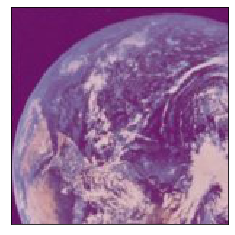

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


f_name="target_data\Earth.jpg"

img = mpimg.imread(f_name) #jpegファイルの読み込み

imgplot = plt.imshow(img)  #jpegファイルの描画
imgplot.axes.set_xticks([]) #x軸の目盛を削除
imgplot.axes.set_yticks([]) #y軸の目盛を削除

### ①jpegファイルのHEXダンプ

"rb"モードでファイルをオープンし、バイナリデータとしてjpgファイルをbytes型の配列sとして読み込み、16データ1行単位でhexダンプ出力


In [2]:
f=open(f_name,"rb")
s=f.read()
f.close

print("       ",end="")
for cnt in range(16):
    print("{:02x} ".format(cnt),end="")
print("")

cnt=0
rows=0

for byte in s:
    if cnt==0:
        print("{:03x}# : ".format(rows),end="")
        
    print("{:02x} ".format(byte),end="")
 
    cnt+=1
    if cnt==16:
        cnt=0
        print("")
        rows+=1


       00 01 02 03 04 05 06 07 08 09 0a 0b 0c 0d 0e 0f 
000# : ff d8 ff e0 00 10 4a 46 49 46 00 01 01 01 00 48 
001# : 00 48 00 00 ff db 00 43 00 05 03 04 04 04 03 05 
002# : 04 04 04 05 05 05 06 07 0c 08 07 07 07 07 0f 0b 
003# : 0b 09 0c 11 0f 12 12 11 0f 11 11 13 16 1c 17 13 
004# : 14 1a 15 11 11 18 21 18 1a 1d 1d 1f 1f 1f 13 17 
005# : 22 24 22 1e 24 1c 1e 1f 1e ff db 00 43 01 05 05 
006# : 05 07 06 07 0e 08 08 0e 1e 14 11 14 1e 1e 1e 1e 
007# : 1e 1e 1e 1e 1e 1e 1e 1e 1e 1e 1e 1e 1e 1e 1e 1e 
008# : 1e 1e 1e 1e 1e 1e 1e 1e 1e 1e 1e 1e 1e 1e 1e 1e 
009# : 1e 1e 1e 1e 1e 1e 1e 1e 1e 1e 1e 1e 1e 1e ff c0 
00a# : 00 11 08 00 96 00 96 03 01 22 00 02 11 01 03 11 
00b# : 01 ff c4 00 1f 00 00 01 05 01 01 01 01 01 01 00 
00c# : 00 00 00 00 00 00 00 01 02 03 04 05 06 07 08 09 
00d# : 0a 0b ff c4 00 b5 10 00 02 01 03 03 02 04 03 05 
00e# : 05 04 04 00 00 01 7d 01 02 03 00 04 11 05 12 21 
00f# : 31 41 06 13 51 61 07 22 71 14 32 81 91 a1 08 23 
010# : 42 b1 c1 15 52 d1 f0 24 33 62 72 82 09 0a

118# : 48 65 b7 12 c6 b1 48 44 44 ed 01 88 c0 23 e9 c1 
119# : a8 f4 30 ec b3 c3 1a fd f8 db 69 23 19 c7 3c fe 
11a# : 55 af a2 f8 5f 5a 96 ee 5b a5 81 1d ed 48 7b 95 
11b# : 70 18 04 e3 ae 3d 8d 4c 9a 57 b9 13 94 55 f9 88 
11c# : 7c 38 6e ae b5 08 e5 ba 13 ad 99 46 2f 84 c8 63 
11d# : 83 80 3f 11 8c d6 f1 82 f7 4f b2 9a fd 62 5f b3 
11e# : 3d 96 01 41 cb 28 61 b4 9c 77 af 43 f8 79 a7 bc 
11f# : f2 a2 98 96 5b 2b 65 3b 08 e0 a1 24 f0 3b f7 23 
120# : 14 ba 9e 9f 14 2d 7f a4 47 6c 62 82 68 5f 6c 92 
121# : 2e 49 5e e3 3d 8d 72 3a e9 cf 94 f3 e7 56 ee f6 
122# : d0 f3 2d 2f 51 96 e0 19 84 52 3a 30 e8 08 01 4f 
123# : 71 45 75 9e 10 f8 7d 75 26 96 54 ba c0 5d 84 a8 
124# : f8 27 2b 8c 63 39 1e 99 e9 45 4c ab 41 36 8a 6e 
125# : 17 d1 1b 7e 04 9e 3d 37 c3 36 8c cb 8c 5a 99 07 
126# : ae e3 92 3f 9d 58 b2 79 20 b4 12 48 0b 3c b9 76 
127# : 27 ae 2a 85 8c 28 d6 36 50 9f bb e5 c6 b8 07 07 
128# : ee 83 57 f5 bc 5b c4 b2 87 f9 36 94 18 f5 f4 ac 
129# : eb 6a ed dc e7 a6 db 72 91 a3 6b ae 58 5b

### ②jpegファイルのマーカー/セグメント/イメージデータ構造の抽出

バイナリデータをバイト単位でチェックし0xFFXX のパターン(マーカー)を検出した場合セグメントとして処理し
セグメント名(辞書定義されていればその文字列、それ以外ならHEX文字列)、セグメント長、セグメントデータ(bytes型)を取り出し、リストjpeg_structに追加。

"SOI","EOI"に関してはマーカーのみなので、セグメント長、セグメントデータなしとしてがjpeg_structリスト上はセグメントと同列に扱う

"SOS"セグメント以降はイメージデータとして"EOI"を検知するまでのデータをイメージデータとして文字列"IMG"及びそのサイズ、データ(bytes型)をリストjpeg_structリストに追加(イメージデータはセグメントではないがjpeg_structリスト上は名称"IMG"をつけてセグメントと同列に扱うことにする)

マーカー0xFF00に関しては0x00のバイナリデータとして変換する。

In [3]:
marker_def={0xd8:"SOI",0xd9:"EOI",0xda:"SOS",0xe0:"APP0",0xdb:"DQT",0xc0:"SOF0",0xc4:"DHT"}

flag_marker= False
flag_seg=False
flag_seg_cnt=False
flag_seg_data=False
flag_SOI= False
flag_EOI= False
flag_SOS= False
flag_err=False
jpeg_struct=[]
seg_buf=[]
byte_bufs=b''
seg_count=0

f=open(f_name,"rb")
s=f.read()
f.close


for byte in s:
    if flag_marker==False and byte==0xFF :  #マーカーの判定
        flag_marker=True
        
    else:
        
        #######    マーカー処理  #########
        if flag_marker==True :  
            #FF00マーカ処理
            if byte==0x00 :
                byte_bufs=byte_bufs+bytes.fromhex("{:02X}".format(0))              
            #辞書定義済みマーカ
            elif byte in marker_def: 
                #SOI判定       
                if flag_SOI==False :
                    if marker_def[byte]=="SOI" :           
                        flag_SOI=True
                        jpeg_struct=jpeg_struct+[["SOI"]]
                    else:
                        flag_err=True;
                        
                #EOI判定    
                elif marker_def[byte]=="EOI":               
                    #IMAGE DATA格納
                    #jpeg_struct=jpeg_struct+[["IMG","{:d}".format(len(byte_bufs)),byte_bufs.hex()]] 
                    jpeg_struct=jpeg_struct+[["IMG","{:d}".format(len(byte_bufs)),byte_bufs]]
                    jpeg_struct=jpeg_struct+[["EOI"]] 
                    flag_EOI=True    
                    
                #その他定義済マーカ（セグメント処理）
                elif byte in marker_def:               
                    seg_buf=[""+marker_def[byte]]
                    flag_seg=True
                    #SOS判定
                    if marker_def[byte]=="SOS":
                        flag_SOS=True
                        
            #未定義マーカ（セグメント処理）
            else:                          
                seg_buf=["FF{:X}".format(byte)]
                flag_seg=True
            
            flag_marker=False
        
        else:
            #セグメント処理
            if flag_seg==True:
                if(flag_seg_cnt==False):
                    seg_count=seg_count+1
                    seg_size_h=byte
                    flag_seg_cnt=True
                elif(flag_seg_data==False):
                    seg_size=seg_size_h*256+byte
                    seg_buf=seg_buf+["{:d}".format(seg_size)]
                    seg_size=seg_size-2
                    byte_bufs=b''
                    flag_seg_data=True
                else:
                    byte_bufs=byte_bufs+bytes.fromhex("{:02X}".format(byte))
                    seg_size=seg_size-1
                    if seg_size==0:
                        #seg_buf=seg_buf+[byte_bufs.hex()]
                        seg_buf=seg_buf+[byte_bufs]
                        jpeg_struct=jpeg_struct+[seg_buf]
                        byte_bufs=b''
                        flag_seg=False
                        flag_seg_cnt=False
                        flag_seg_data=False
                        
            #IMAGE DATA処理 (SOSセグメント後)
            elif flag_SOS==True and flag_seg==False:                  
                byte_bufs=byte_bufs+bytes.fromhex("{:02X}".format(byte))
                
            #例外処理
            else:
                flag_err=True
        
    
    if flag_err==True or flag_EOI==True:
        break;

                
if flag_err==False and flag_EOI==True:
    print("Succeeded!!")


Succeeded!!


抽出したjpegファイルの構造(リスト型 jpeg_struct)の出力

len()関数でセグメント(含：マーカのみ/イメージデータ)の数を出力

In [4]:
len(jpeg_struct)

12

In [5]:
for seg in jpeg_struct:
    print(seg[0])   

SOI
APP0
DQT
DQT
SOF0
DHT
DHT
DHT
DHT
SOS
IMG
EOI


In [6]:
jpeg_struct[0]

['SOI']

In [7]:
jpeg_struct[2]

['DQT',
 '67',
 b'\x00\x05\x03\x04\x04\x04\x03\x05\x04\x04\x04\x05\x05\x05\x06\x07\x0c\x08\x07\x07\x07\x07\x0f\x0b\x0b\t\x0c\x11\x0f\x12\x12\x11\x0f\x11\x11\x13\x16\x1c\x17\x13\x14\x1a\x15\x11\x11\x18!\x18\x1a\x1d\x1d\x1f\x1f\x1f\x13\x17"$"\x1e$\x1c\x1e\x1f\x1e']

In [8]:
jpeg_struct[10]

['IMG',
 '6935',
 b'\xf0\xac\xf3\xc7\x06\xa4\x13\xce\x0eD\xd2\x03\xea\x1c\xd4da\x88\xee\r\x07\xda\xbe\xa8\xfb\xad\x07\x9b\x8b\x83\xc1\x9eS\x00\x034\t\xe7\xc7\xfa\xe91\xfe\xf1\xa8\xf3\x8a\x06)h\x16\x1c^Br]\xbf\x13@\x92@p$`=\x8d4\x9e\xd8\xa4\x14\xec\x16%Y\xe7\x1d\'\x90\x7f\xc0\x8d\r4\xc7\x93,\x87\xfe\x04x\xa8\xf2E:4y\\$H\xce\xc7\xa0Q\x93H4D\x8f<\xac\xa0y\xb2g\xb9\xdey\xa6y\xb2\x00\xcfW\xc7\xfb\xc6\xb7t\xdf\t\xea7@<\xfbm\x90\x00{\xaf\xe5]\x1e\x9f\xe0\xfd>-\xaf!y\xf1\xd7q\xe3?J\x97$\x8eJ\x98\xda4\xde\xf78\x052\xb9\xc2\x99\x0f\xd0\x93W\xa2\xd3\xb5i\x94l\xb7\xb9+\xdb9\x1f\xce\xbd.\xdbO\xb2\xb5\x19\x8e\xd65\x03\xfb\xaa*\xe404\x84\xc8\xaa\xbeZ\xf3\xb9\x85K\x99\xc5<\xcf\xf9by\x8c~\x1c\xd6_\x83\tS\xe8\xcdWW\xc2\xba\xd2\xa0+:\xaf\xfd\xb4"\xbd.\xe2[\x15@\xf0+\xb1\x00n\xc8\x18\x06\xa9\xcd .\x1aU\x08\x08\xf9s\xde\x8efa\xfd\xa5Y\xec\x8f>\x97\xc2\xfa\xd0\xc12,\x80r\x07\x98j\xad\xce\x85\xae\x0e^\t$\xf4\xc3\xe6\xbd)\xc1\x1bK!UnFML\x0c8*\xa0\x1f\xd6\x8e`Y\x95U\xbaL\xf2\x0b\x9b}B\x03\xfb\xe8\xae\x13\xdc\x

In [9]:
jpeg_struct[11]

['EOI']

### 各セグメントの解析

jpeg_structの各セグメントのデータよりセグメントを構成するパラメータを出力する。<br>
(格納する形式を決めてないのでとりあえず出力のみとする、、)

サポートするセグメント(マーカー)もとりあえず以下に限定する(JFIF形式に限定)
* SOI
* APP0 JFIFフォーマット
* DHT ハフマンテーブル
* SOF0 フレームヘッダ(SOF0のみ)
* DQT 量子化テーブル
* SOS スキャンヘッダ
* EOI

In [10]:
flag_SOI= False
flag_EOI= False
flag_SOS= False
flag_err=False          

for seg in jpeg_struct:
    print(seg[0])

    if(seg[0] == "IMG"):
        print("  DATA LENGTH : ",seg[1],sep="")
    else:

        if(seg[0] == "SOI"):
            flag_SOI=True
        elif(seg[0] == "EOI"):
            flag_EOI=True
        else:
            print("  SEG LENGTH : ",seg[1])
            data=seg[2]

            
            ########       APP0   JFIFフォーマット       ######

            if(seg[0] == "APP0"):
                print("  ID : ",data[0:4].decode(),sep="")    #JFIF識別子
                print("  Ver : ",data[5],".",data[6],sep="")  #バージョン番号
                print("  U : ",data[7],sep="")                #ピクセル濃度の単位 0:不定 1:pixels/inch(dpi) 3: pixel/cm　
                print("  Xd : ",data[8]*256+data[9],sep="")   #縦のピクセル濃度
                print("  Yd : ",data[10]*256+data[11],sep="") #横のピクセル濃度
                print("  Xt : ",data[12],sep="")              #サムネイルイメージの横幅(サムネイル無なら0)
                print("  Yt : ",data[13],sep="")              #サムネイルイメージの高さ(サムネイル無なら0)             
                for i in range(data[12]*data[13]):          
                    print("  RGB",i," : (",data[14+i*3],",",data[15+i*3],",",data[16+i*3],")",sep="")
                                                                          #サムネイルイメージRGB値                    
                        
                        
            ########       DQT   量子化テーブル定義      ######

            elif(seg[0] == "DQT"):
                length = int(seg[1])-3
                base = 0
                while(length >0):
                    pqn=data[0]>>4
                    tqn=data[base]&0x0F;
                    if(pqn==0):
                        qlen=64;
                    else:
                        qlen=128;
                    print("  Pq",tqn," : ",pqn,sep="")         #量子化テーブル精度 0;8bit , 1:16bit
                    print("  Tq",tqn," : ",tqn,sep="")         #量子化テーブル番号 0 to 3
                    for i in range(qlen):
                        print("  Q",tqn,"-",ascii(i)," : ",data[base+1+i],sep="")
                                                               #量子化因子(量子化係数)
                    length-=qlen
                    base+=qlen  

                    
            ########       SOF0 フレームタイプ0開始　(Baseline-DCT & ハフマン符号)   ######
            
            elif(seg[0] == "SOF0"):
                nf=data[5]
                print("  P : ",data[1])                             #サンプルの精度
                print("  Y : ",data[1]*256+data[2],sep="")         #画像縦サイズ
                print("  X : ",data[3]*256+data[4],sep="")         #画像横サイズ
                print("  Nf : ",data[5])                           #構成要素数 1;GreyScacle ,3;YCbCr or YIQ 4;CMYK
                for i in range(nf):
                    print("  C",i+1," : ",data[6+i*3],sep="")      #構成要素 識別子 1:Y 2:Cb 3:Cr 4:I 5:Q
                    print("  H",i+1," : ",data[7+i*3]>>4,sep="")   #構成要素サ 水平方向ンプル化要因(比率)
                    print("  V",i+1," : ",data[7+i*3]&0x0F,sep="") #構成要素 垂直報告サンプル化要因(比率)
                    print("  Tq",i+1," : ",data[8+i*3],sep="")     #構成要素 量子化テーブル番号
 
            ########       DHT   ハフマン符号テーブル定義      ######

            elif(seg[0] == "DHT"):
                thn=data[0]&0x0f
                tcn=data[0]>>4
                print("  Tc",thn," : ",tcn,sep="")                          #クラス 0;DC , 1:1AC ？？
                print("  Th",thn," : ",thn,sep="")                          #ハフマン符号テーブル番号
                vlen=[]
                for i in range(16):
                    vlen+= [data[1+i]]
                    print("  L",i+1," ; ",data[1+i],sep="")          #符号長ごとの符号数
                
                base = 17

                for i in range(16):
                    for j in range(vlen[i]):
                        if(tcn==0):
                            print("  V",i+1,"-",j+1," : ",data[base+j],sep="")
                                                   #各符号長の符号(tcn=0のとき)　データービット数
                        else:
                            print("  V",i+1,"-",j+1," : ",data[base+j]>>4,",",data[base+j]&0x0F,sep="")
                                                   #各符号長の符号(tcn=1のとき) ランレングス数、データービット数                         
                            
                    base+=vlen[i]

            ########       SOS   Start Of Scan      ######                    
                    
            elif(seg[0] == "SOS"):
                ns=data[0]
                print("  Ns : ",ns)                                   #構成要素の数
                
                for i in range(ns):
                    print("  Cs",i+1," : ",data[1+i*2],sep="")        #構成要素 識別子
                    print("  Td",i+1," : ",data[2+i*2]>>4,sep="")     #構成要素 DC成分ハフマン符号テーブル番号
                    print("  Ta",i+1," : ",data[2+i*2]&0x0F,sep="")   #構成要素 AC成分ハフマン符号テーブル番号
                    
                print("  Ss : ",data[1+ns*2],sep="")                   #スペクトル選択開始(量子化係数開始番号)
                print("  Se : ",data[2+ns*2],sep="")                   #スペクトル選択終了量子化係数開始終了)
                print("  Ah : ",data[3+ns*2]>>4,sep="")                #？？
                print("  Al : ",data[3+ns*2]&0x0f,sep="")              #？？
                
                

SOI
APP0
  SEG LENGTH :  16
  ID : JFIF
  Ver : 1.1
  U : 1
  Xd : 72
  Yd : 72
  Xt : 0
  Yt : 0
DQT
  SEG LENGTH :  67
  Pq0 : 0
  Tq0 : 0
  Q0-0 : 5
  Q0-1 : 3
  Q0-2 : 4
  Q0-3 : 4
  Q0-4 : 4
  Q0-5 : 3
  Q0-6 : 5
  Q0-7 : 4
  Q0-8 : 4
  Q0-9 : 4
  Q0-10 : 5
  Q0-11 : 5
  Q0-12 : 5
  Q0-13 : 6
  Q0-14 : 7
  Q0-15 : 12
  Q0-16 : 8
  Q0-17 : 7
  Q0-18 : 7
  Q0-19 : 7
  Q0-20 : 7
  Q0-21 : 15
  Q0-22 : 11
  Q0-23 : 11
  Q0-24 : 9
  Q0-25 : 12
  Q0-26 : 17
  Q0-27 : 15
  Q0-28 : 18
  Q0-29 : 18
  Q0-30 : 17
  Q0-31 : 15
  Q0-32 : 17
  Q0-33 : 17
  Q0-34 : 19
  Q0-35 : 22
  Q0-36 : 28
  Q0-37 : 23
  Q0-38 : 19
  Q0-39 : 20
  Q0-40 : 26
  Q0-41 : 21
  Q0-42 : 17
  Q0-43 : 17
  Q0-44 : 24
  Q0-45 : 33
  Q0-46 : 24
  Q0-47 : 26
  Q0-48 : 29
  Q0-49 : 29
  Q0-50 : 31
  Q0-51 : 31
  Q0-52 : 31
  Q0-53 : 19
  Q0-54 : 23
  Q0-55 : 34
  Q0-56 : 36
  Q0-57 : 34
  Q0-58 : 30
  Q0-59 : 36
  Q0-60 : 28
  Q0-61 : 30
  Q0-62 : 31
  Q0-63 : 30
DQT
  SEG LENGTH :  67
  Pq1 : 0
  Tq1 : 1
  Q1-0 : 5
  Q1